Homework 3 Submission - CS498H/598H

Dr. Liu, Hood College, Spring 2019

Joshua Clemens

02/12/2019

In [4]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image as Pillow

Load the Fashion MNIST dataset and create model structure

In [5]:
# Load testing and training data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess image values to be in [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build model
model = keras.Sequential([
    # First layer transforms the format of images from a 2d array (of 28x28 pixels)
    # To a 1d array of 28 * 28 (784) pixels
    keras.layers.Flatten(input_shape=(28,28)),
    # Second layer (dense, fully connected) has 128 nodes (or neurons)
    keras.layers.Dense(128, activation=tf.nn.relu),
    # Third layer, softmax layer, returns an array of 10 probability scores
    #  that sum to 1
    # Each node contains a score that indicates the probability that the 
    #  current image belongs to one of the 10 classes
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train the model against the processed data

In [6]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.4988 - acc: 0.8243
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3723 - acc: 0.8658
Epoch 3/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.3352 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3130 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2951 - acc: 0.8911


Evaluate our model's performance by observing it's loss and accuracy against the test data

In [7]:
loss, acc = model.evaluate(test_images, test_labels)
print('Loss', loss)
print('Accuracy', acc)

10000/10000 [==============================] - 0s 34us/step
Loss 0.3513165814399719
Accuracy 0.8695


Define helper functions to load and manipulate test images

In [142]:
def resizeImages(images):
 return [ x.resize((28,28)) for x in images ]

def convertToArray(images):
  return [ np.array(x) for x in images ]

def convertToModelValues(images):
  return [ x/255.0 for x in images ]

# Conversion formula found here: https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
def rgb2grayFirst(images):
  return [ np.dot(x[...,:3], [0.299, 0.587, 0.114]) for x in images ]

# Conversion formula found here (CRT phosphors): https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python/12201744#12201744
def rgb2graySecond(images):
  return [ np.dot(x[...,:3], [0.2125, 0.7154, 0.0721]) for x in images ]

# Loads images and converts them
# If preprocess == true, then convert RGB to grayscale using Pillow utilities
# Else, we use another formula for converting to R
def loadImages(num_images, preprocess):
  imgs = []
  for x in range(num_images):
    image_name = 'img_' + str(x) + '.jpg'
    if (preprocess):
      image = Pillow.open(image_name).convert('L')
    else:
      image = Pillow.open(image_name)
    imgs.append(image)
  imgs = resizeImages(imgs)
  imgs = convertToArray(imgs)
  return imgs

# We can graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Load our test images using our 4 methods of RGB to grayscale image manipulation

1. First set: Processed using first RGB to grayscale formula
2. Second set: Processed using second RGB to grayscale formula
3. Third set: Processed using Pillow library's built in grayscale conversion
4. Fourth set: Processed using gimp

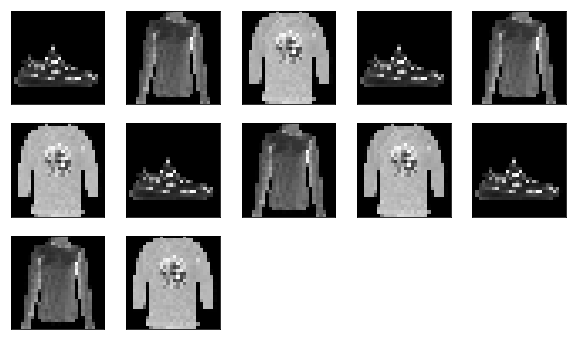

In [148]:
image_set_1 = loadImages(3, False)
image_set_1 = rgb2grayFirst(image_set_1)
image_set_1 = convertToModelValues(image_set_1)
image_set_2 = loadImages(3, False)
image_set_2 = rgb2graySecond(image_set_2)
image_set_2 = convertToModelValues(image_set_2)
image_set_3 = loadImages(3, True)
image_set_3 = convertToModelValues(image_set_3)
image_set_4 = [ Pillow.open('img_processed_' + str(x) + '.jpg') for x in range(3) ]
image_set_4 = resizeImages(image_set_4)
image_set_4 = convertToArray(image_set_4)
image_set_4 = convertToModelValues(image_set_4)
merged_set = image_set_1 + image_set_2 + image_set_3 + image_set_4
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(merged_set[i], cmap=plt.cm.binary)
plt.show()

Iterate through our images and run them against our model

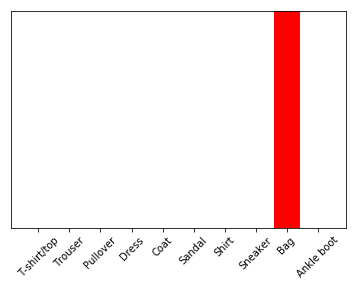

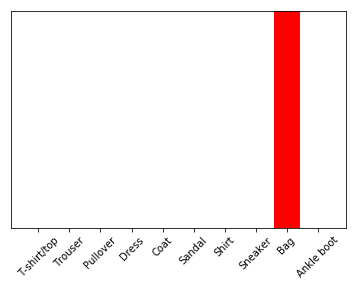

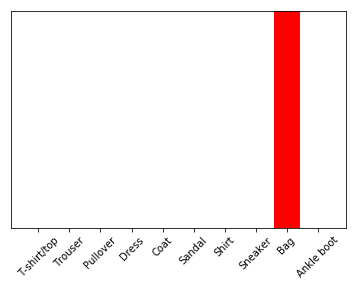

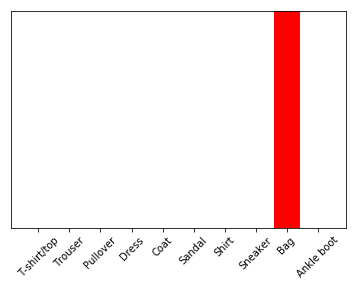

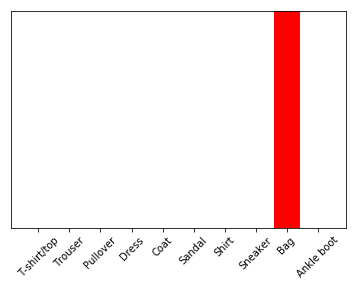

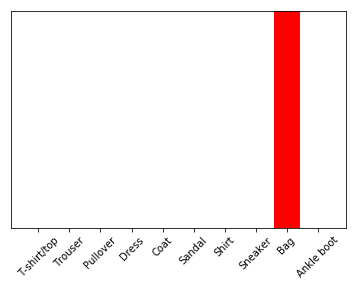

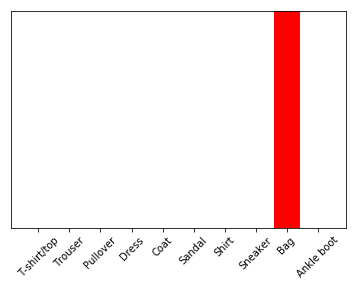

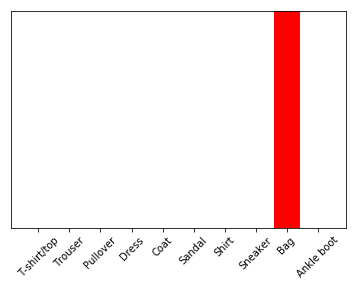

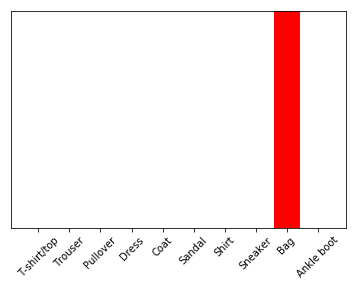

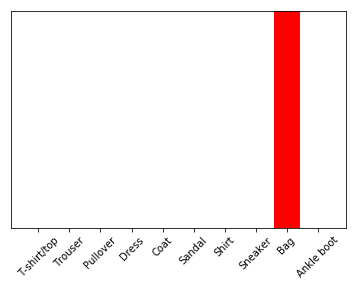

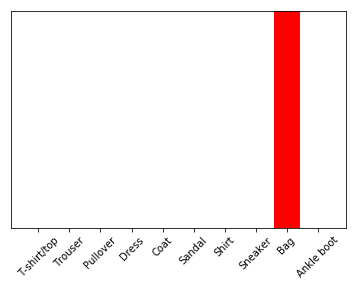

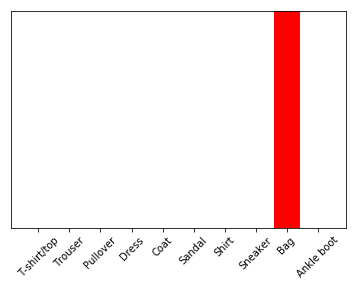

In [149]:
for img in merged_set:
  batch = (np.expand_dims(img,0))
  prediction = model.predict(batch)
  plot_value_array(0, prediction, test_labels)
  _ = plt.xticks(range(10), class_names, rotation=45)
  plt.show()

In conclusion, it doesn't appear that any of the image manipulation types worked on the test data. The model predicted that each image was a bag. This is probably due to the fact that the images processed above are not in the same format as the images from the training/test data set.